# Submission 1 - Predictive Analysis

##Walmart Sales Prediction

Nama    : Ainun Annisa K

Dataset : [Walmart Dataset](https://www.kaggle.com/datasets/yasserh/walmart-dataset)


### Domain Project

Memprediksi permintaan suatu produk dan menyimpannya sesuai kebutuhan dimasa yang akan datang merupakan hal penting dalam penjualan bisnis supermarket. Dengan prediksi yang akurat, dapat dicapai retensi pelanggan yang lebih baik, kepuasan pelanggan, dan menghindari situasi stok berlebihan dan kekurangan stok [[1]](https://ijcrt.org/papers/IJCRT22A6470.pdf).

Salah satu toko ritel terkemuka di Amerika Serikat, yaitu Walmart, ingin memprediksi penjualan dan permintaan dengan akurat. Ada beberapa acara dan hari libur yang mempengaruhi penjualan setiap harinya [[2]](https://www.kaggle.com/code/yasserh/walmart-sales-prediction-best-ml-algorithms). Pada project ini, akan dilakukan prediksi Machine Learning untuk penjualan mingguan pada supermarket Walmart.


Import Library

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


### Data Understanding

In [7]:
data = pd.read_csv('/content/Walmart.csv')

In [8]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000




* Transaksi mingguan terjadi selama periode tiga tahun (2010-2012) di 45 toko.
* Penjualan maksimum per minggu mencapai $3,8 juta
* Hari dengan temperatur terpanas mencapai suhu 100°F.



In [13]:
# Split kolom Date
data['Date'] = pd.to_datetime(data['Date'])
data['year']= data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.head()

<ipython-input-13-1247b10f3e64>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


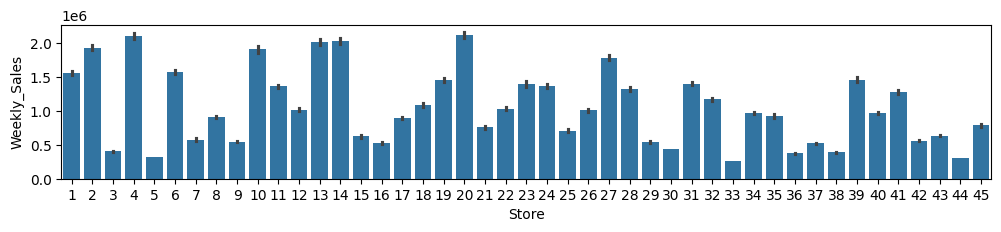

In [14]:
plt.figure(figsize=(12, 2))
sns.barplot(data=data, x='Store', y='Weekly_Sales')
plt.show()

* Toko 4 dan 20 memiliki tingkat penjualan mingguan tertinggi
* Toko 5 dan 33 memiliki tingkat penjualan mingguan terendah

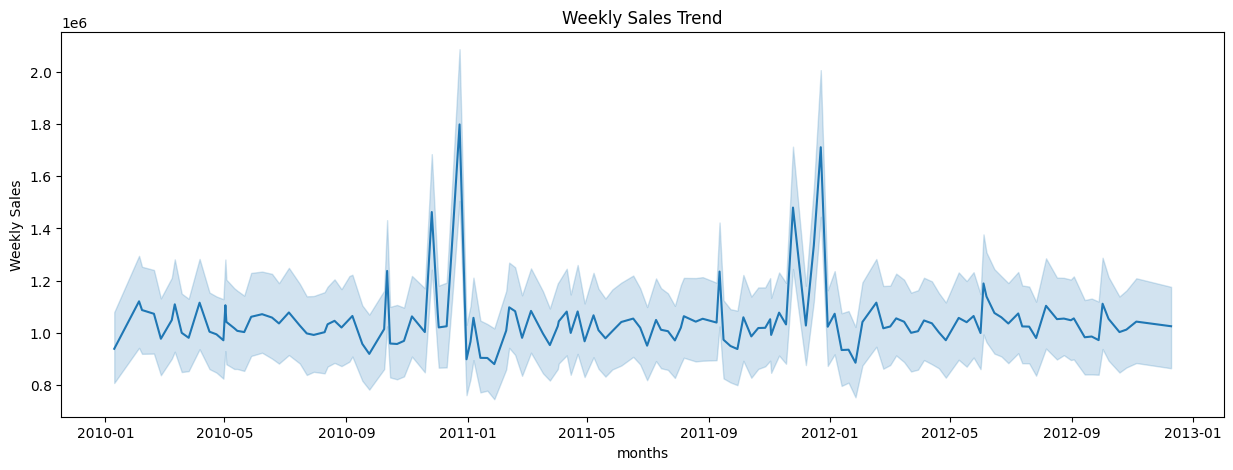

In [15]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='Date', y='Weekly_Sales')
plt.xlabel('months')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Trend')
plt.show()

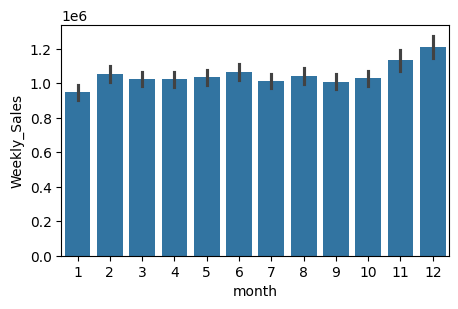

In [16]:
# Melihat plot weekly sales disetiap bulan
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='month', y='Weekly_Sales')
plt.show()


Grafik menunjukkan bahwa penjualan mingguan di Walmart umumnya tetap stabil sepanjang tahun, kecuali pada bulan November dan Desember yang mengalami peningkatan penjualan yang signifikan.
Kenaikan ini kemungkinan terjadi karena musim liburan. Namun terjadi penurunan signifikan di bulan Januari, ini kemungkinan disebabkan karena event atau promo menarik telah dilaksanakan di dua bulan sebelumnya dan pelanggan telah menghabiskan uangnya di bulan November dan Desember.

### Data Preparation

In [17]:
#Cek missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [18]:
#Cek duplicated data
data.duplicated().sum()

0

* Tidak ada missing values
* Tidak ada data yang duplikat

In [19]:
# Copy the dataest
data_copy = data.copy()

In [20]:
# Menghapus kolom Date karena telah di pisahkan berdasarkan year, month, day
data_copy.drop(['Date'], axis=1, inplace=True)

In [21]:
# Menghapus kolom Weekly_Sales untuk memisahkan variabel predictor dan target
x = data_copy.drop(['Weekly_Sales'], axis=1)
y = data_copy['Weekly_Sales']

In [22]:
#Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
# Split dataset dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=50)

### Modeling



In [25]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  ytrain_pred=model.predict(X_train)
  ytest_pred=model.predict(X_test)

  train_score=np.sqrt(mean_squared_error(y_train,ytrain_pred))
  val_score=np.sqrt(mean_squared_error(y_test,ytest_pred))
  return ytest_pred, train_score, val_score


In [26]:
# Model Linear Regression
linear_regression = LinearRegression()
lr_pred, lr_train, lr_val = evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

In [27]:
# Model Support Vector Regressor
sv_regressor = SVR()
svr_pred, svr_train, svr_val = evaluate_model(sv_regressor, X_train, y_train, X_test, y_test)

In [28]:
# Model Random Forest Regressor
randomforest_regressor = RandomForestRegressor()
rfr_pred, rfr_train, rfr_val = evaluate_model(randomforest_regressor, X_train, y_train, X_test, y_test)

###Evaluation

In [29]:
val_scores = {
    'LinearRegression': np.sqrt(lr_val),
    'SVR': np.sqrt(svr_val),
    'RandomForestRegressor': np.sqrt(rfr_val),
}

In [30]:
models = ['Linear Regression', 'Support Vector Regressor', 'Random Forest Regressor']
train_score = [lr_train, svr_train, rfr_train]
validation_score = [lr_val, svr_val, rfr_val]

In [31]:
# Create a DataFrame from the RSME validation results
results = pd.DataFrame(list(zip(models, train_score, validation_score)), columns=['Model', 'Train', 'Test'])
results

,Model,Train,Test
0,Linear Regression,521308.592130,520962.802146
1,Support Vector Regressor,571446.438654,568799.580038
2,Random Forest Regressor,45157.623051,114990.508702


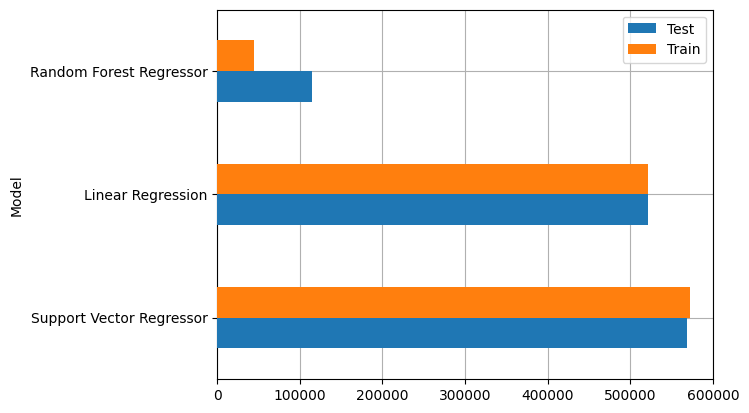

In [32]:
fig, ax = plt.subplots()
results.sort_values(by='Train', ascending=False).plot(kind='barh', x='Model', y=['Test', 'Train'], ax=ax, zorder=3)
ax.grid(zorder=0)
plt.show()

In [33]:
# Prediksi dengan 10 data
prediksi = X_test[:10].copy()

# Inisialisasi pred_dict dengan data aktual
pred_dict = {'y_true': y_test[:10]}

# Menambahkan prediksi untuk masing-masing model
pred_dict['prediksi_LR'] = lr_pred[:10].round(1)
pred_dict['prediksi_SVR'] = svr_pred[:10].round(1)
pred_dict['prediksi_RFR'] = rfr_pred[:10].round(1)

# Membuat DataFrame dari pred_dict
pd.DataFrame(pred_dict)


,y_true,prediksi_LR,prediksi_SVR,prediksi_RFR
559,2174514.13,1421495.4,960363.5,2178019.8
5825,1238844.56,821589.2,960283.1,1412937.4
6275,358461.58,833694.4,960244.7,331128.9
1316,1727565.42,1291498.6,960359.0,1864301.6
2291,749549.55,1249850.4,960314.6,854783.5
856,1436883.99,1253474.3,960296.0,1448458.7
6256,315641.80,773757.2,960247.9,310259.4
2050,509640.77,1324343.1,960381.5,553441.9
5344,377672.46,869558.8,960280.3,370263.2
784,1705506.29,1213514.7,960314.2,1599620.0
